# Tutorial: Testing the RJSPEnv with Proposed Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Import the environment class
from rl_scheduler.RJSPEnv.Env import RJSPEnv

# Import the PPO algorithm from stable-baselines3
from sb3_contrib import MaskablePPO

# For rendering in Jupyter Notebook
from IPython.display import Image, display

In [4]:
# Paths to the configuration files
instance = "12x8"
machine_config_path = f'rl_scheduler/instances/Machines/v0-{instance}.json'
job_config_path = f'rl_scheduler/instances/Jobs/v0-{instance}-12.json'

# Job repeats parameters (mean, std) for each job
job_repeats_params = [(3, 1)] * 12  # 8 jobs with mean repeats of 8 and std of 2

In [5]:
# Create the environment
env = RJSPEnv(
    machine_config_path=machine_config_path,
    job_config_path=job_config_path,
    job_repeats_params=job_repeats_params,
    max_time=50
)

In [7]:
# Path to the pre-trained model
model_path = 'rl_scheduler/models/paper/0-paper-8x12-18m/MP_Single_Env4_gamma_1_obs_v4_clip_1_lr_custom_expv1_18000000.zip'

# Load the model
model = MaskablePPO.load(model_path, env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


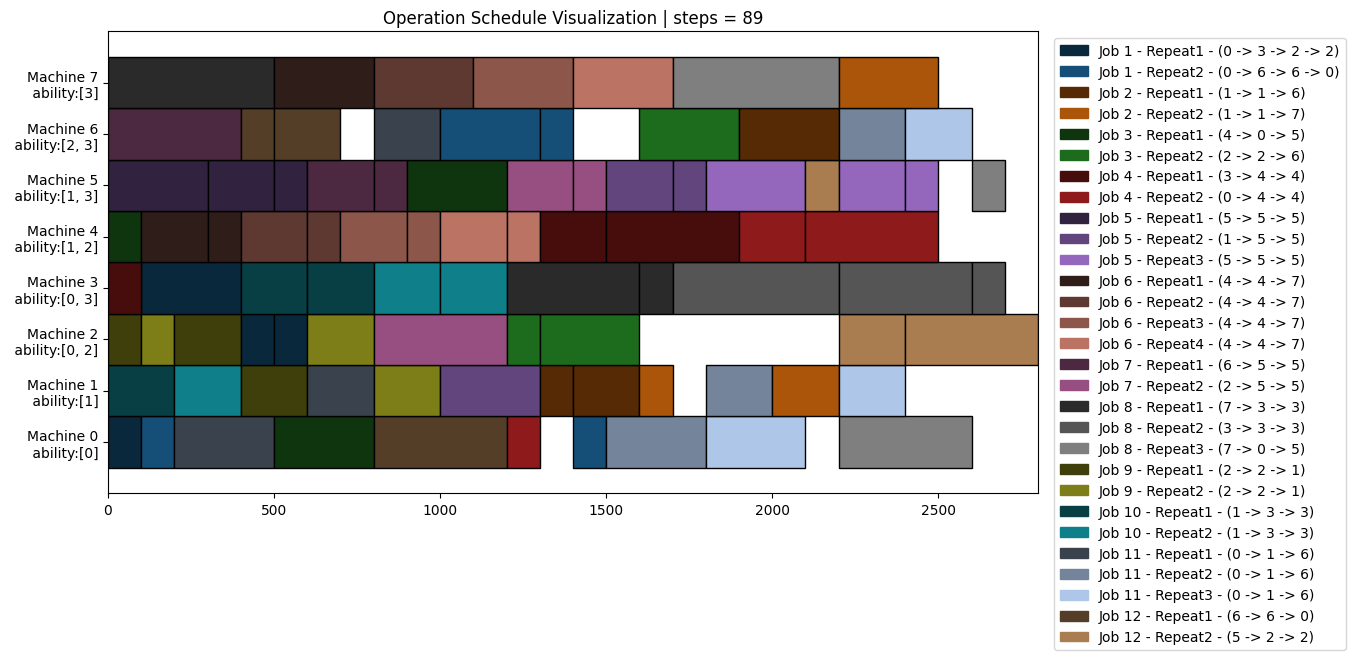

In [10]:
# Reset the environment
obs, _ = env.reset()

# Initialize variables
done = False
steps = 0

# Run the model until the episode is done
while not done:
    # Use the model to predict the action
    action_masks = env.action_masks()

    # Use the model to predict the action with action masks
    action, _ = model.predict(obs, deterministic=True, action_masks=action_masks)
    
    # Take the action in the environment
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    
    if done:
        env.render()